In [25]:
import pandas as pd
import numpy as np
import dtale

import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
import plotly.io as pio


## EDA Part 1: Data Summarization & Visualization 

In [26]:
df = pd.read_csv("cleaned_df.csv")

df.head()

,Year,Brand,Model,Body Type,Drivetrain,Interior Colour,Exterior Colour,Fuel Type,Transmission Type,Doors,Cylinder Count,Fuel Efficiency (Lt/100kms),Distance (km),Mileage (kms/Lt),Years Used,Price
0,2019,Acura,Other Model Type,SUV,AWD,Red,Black,Gas,Automatic,NaN,6.0,10.87,53052,9.2,5,43880
1,2018,Acura,Other Model Type,SUV,AWD,Black,Other Colour,Gas,Automatic,NaN,6.0,10.98,77127,9.1,6,36486
2,2019,Acura,Other Model Type,SUV,AWD,Black,White,Premium Unleaded,Automatic,4.0,4.0,9.92,33032,10.1,5,40888
3,2020,Acura,Other Model Type,SUV,AWD,Black,White,Gas,Other,NaN,4.0,9.92,50702,10.1,4,44599
4,2021,Acura,Other Model Type,SUV,AWD,Red,Blue,Gas,Other,NaN,4.0,10.31,67950,9.7,3,46989


In [27]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14502 entries, 0 to 14501
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         14502 non-null  int64  
 1   Brand                        14502 non-null  object 
 2   Model                        14502 non-null  object 
 3   Body Type                    14502 non-null  object 
 4   Drivetrain                   14151 non-null  object 
 5   Interior Colour              14502 non-null  object 
 6   Exterior Colour              14502 non-null  object 
 7   Fuel Type                    14502 non-null  object 
 8   Transmission Type            14502 non-null  object 
 9   Doors                        11660 non-null  float64
 10  Cylinder Count               9604 non-null   float64
 11  Fuel Efficiency (Lt/100kms)  14502 non-null  float64
 12  Distance (km)                14502 non-null  int64  
 13  Mileage (kms/Lt)

,Year,Doors,Cylinder Count,Fuel Efficiency (Lt/100kms),Distance (km),Mileage (kms/Lt),Years Used,Price
count,14502.000000,11660.000000,9604.000000,14502.000000,14502.000000,14502.000000,14502.000000,1.450200e+04
mean,2018.543235,3.713722,4.994690,9.950298,69202.984002,10.538808,5.456765,4.384359e+04
std,3.908092,0.769877,1.446996,2.205884,65137.461611,2.334378,3.908092,4.751672e+04
min,1997.000000,2.000000,3.000000,4.040000,0.000000,2.400000,1.000000,2.000000e+03
25%,2017.000000,4.000000,4.000000,8.320000,9237.250000,8.800000,2.000000,2.299500e+04
50%,2019.000000,4.000000,4.000000,9.880000,56828.000000,10.100000,5.000000,3.399800e+04
75%,2022.000000,4.000000,6.000000,11.300000,108739.500000,12.000000,7.000000,5.380000e+04
max,2023.000000,5.000000,12.000000,40.820000,480000.000000,24.800000,27.000000,1.250000e+06


In [28]:
# dtale.show(df)
# dtale.show(df, open_browser = True)

In [29]:
columns = df.columns.values
# print(columns)
categorical_columns = df.select_dtypes(exclude=['number']).columns
# print(len(categorical_columns), categorical_columns.values)
numeric_columns = df.select_dtypes(include=['number']).columns
# print(len(numeric_columns), numeric_columns.values)

## 1. Box Plot for Outlier Detection:

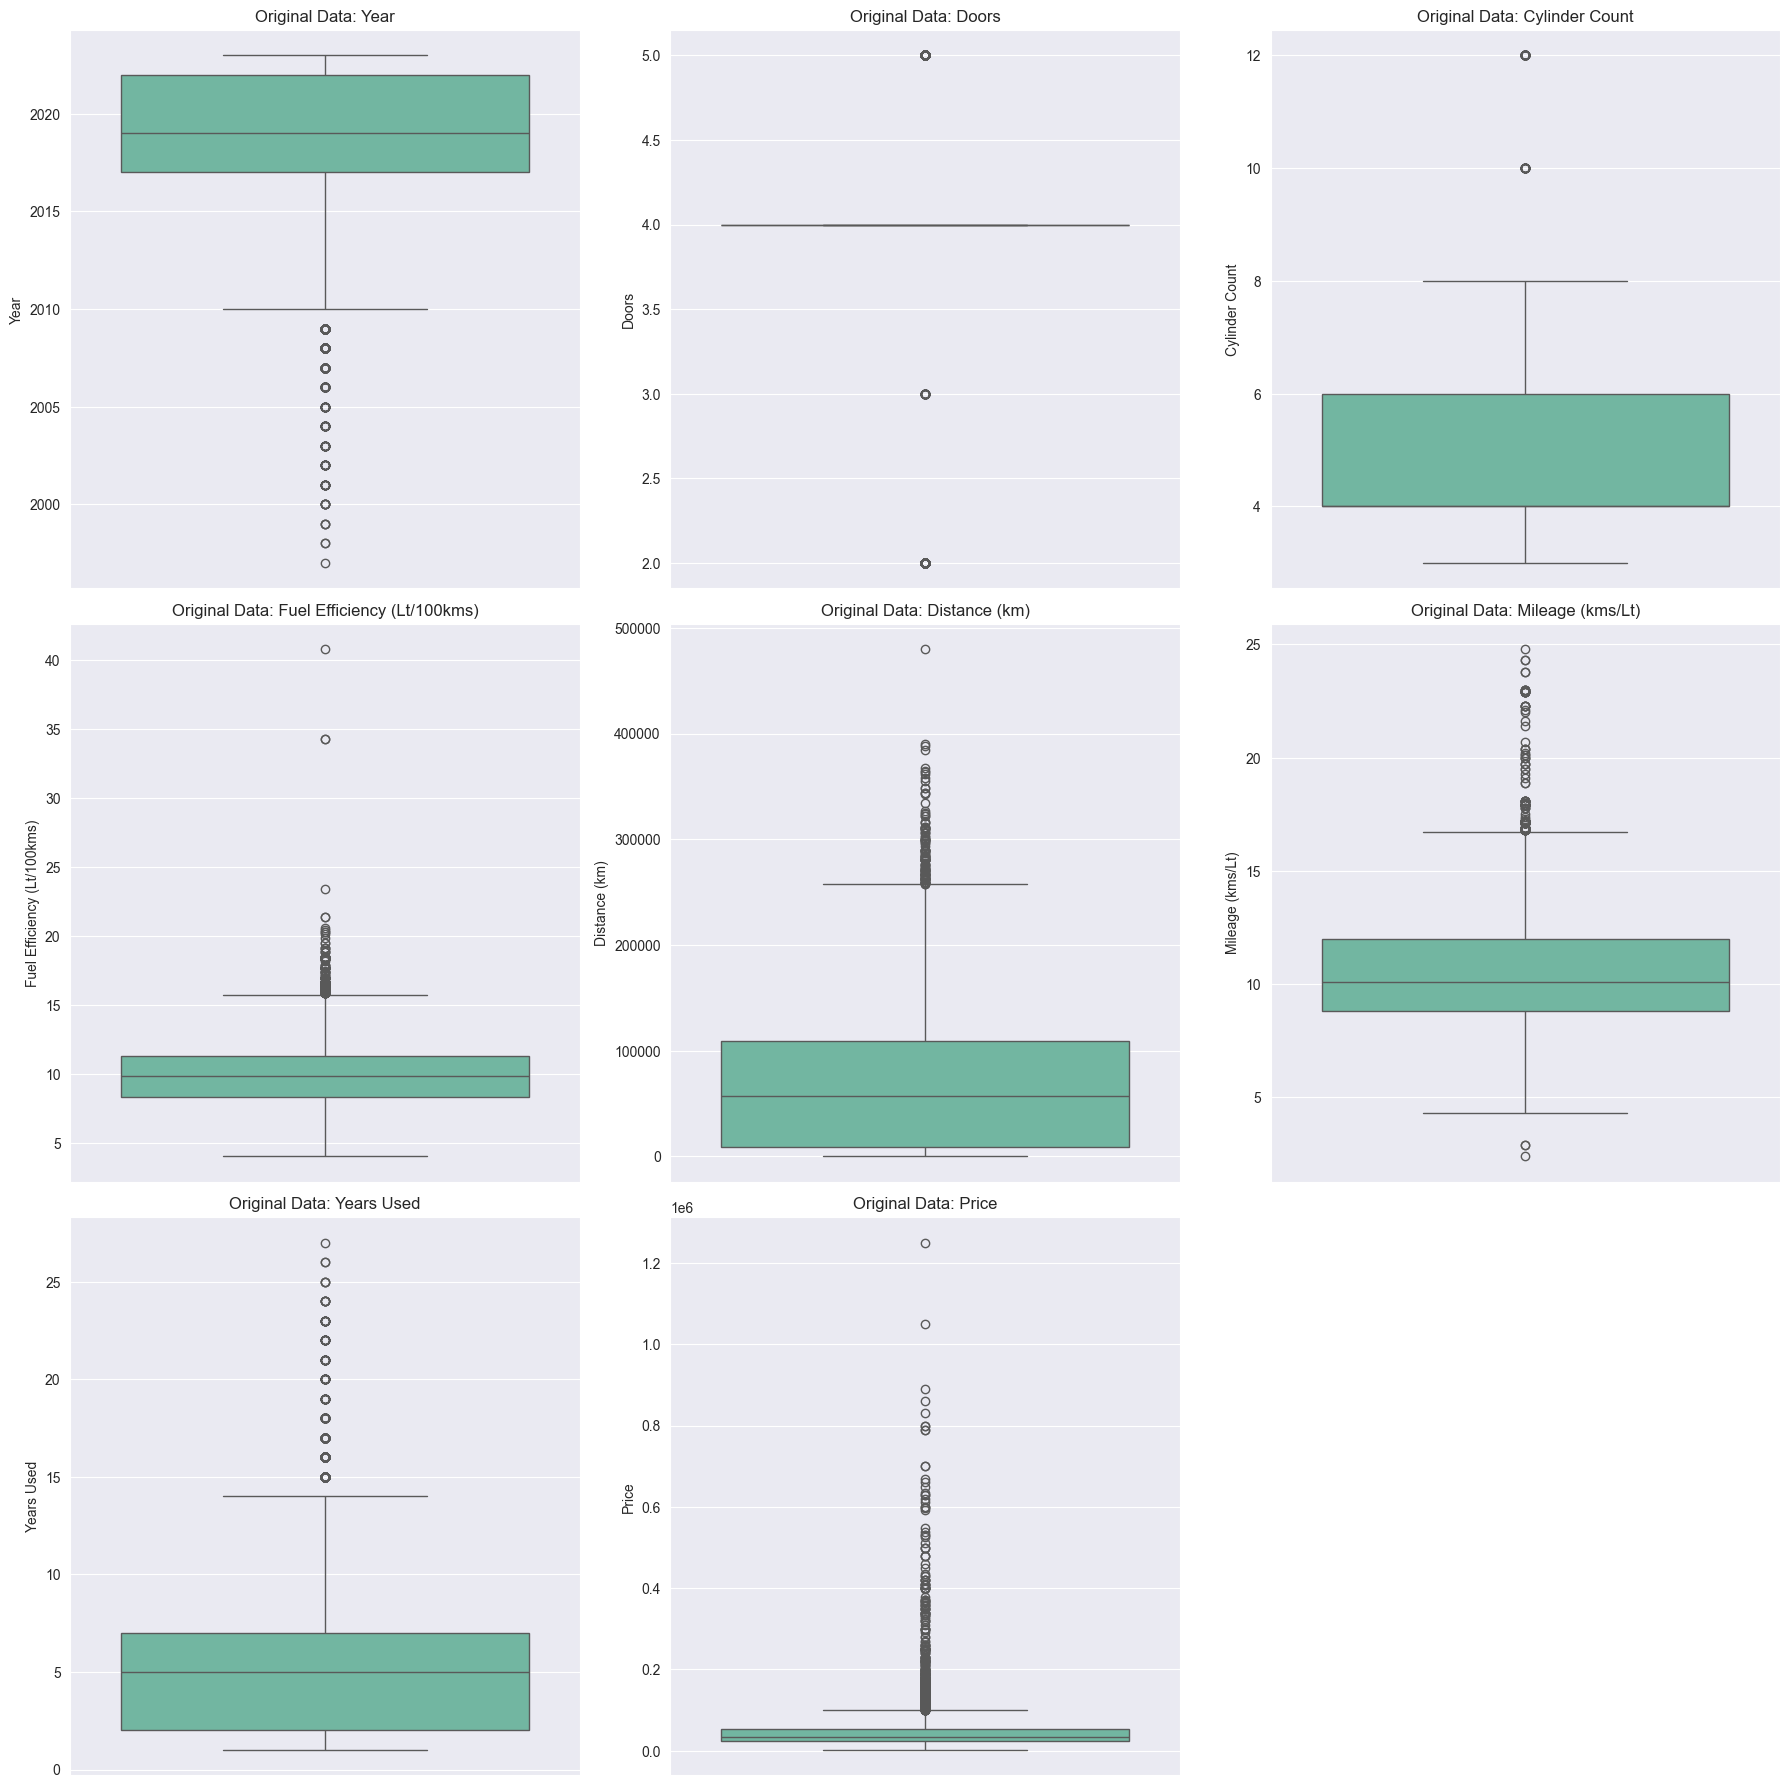

In [30]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

# Plotting boxplots for the numeric columns in the original data
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Original Data: {col}')

# Hide the last empty subplot if any
if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        axes[j].axis('off')

plt.tight_layout()
plt.show()

### Removing Outliers:

In [31]:
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    
    # Filter for non-outliers
    df_clean = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_clean

df_clean = remove_outliers_iqr(df, numeric_columns)

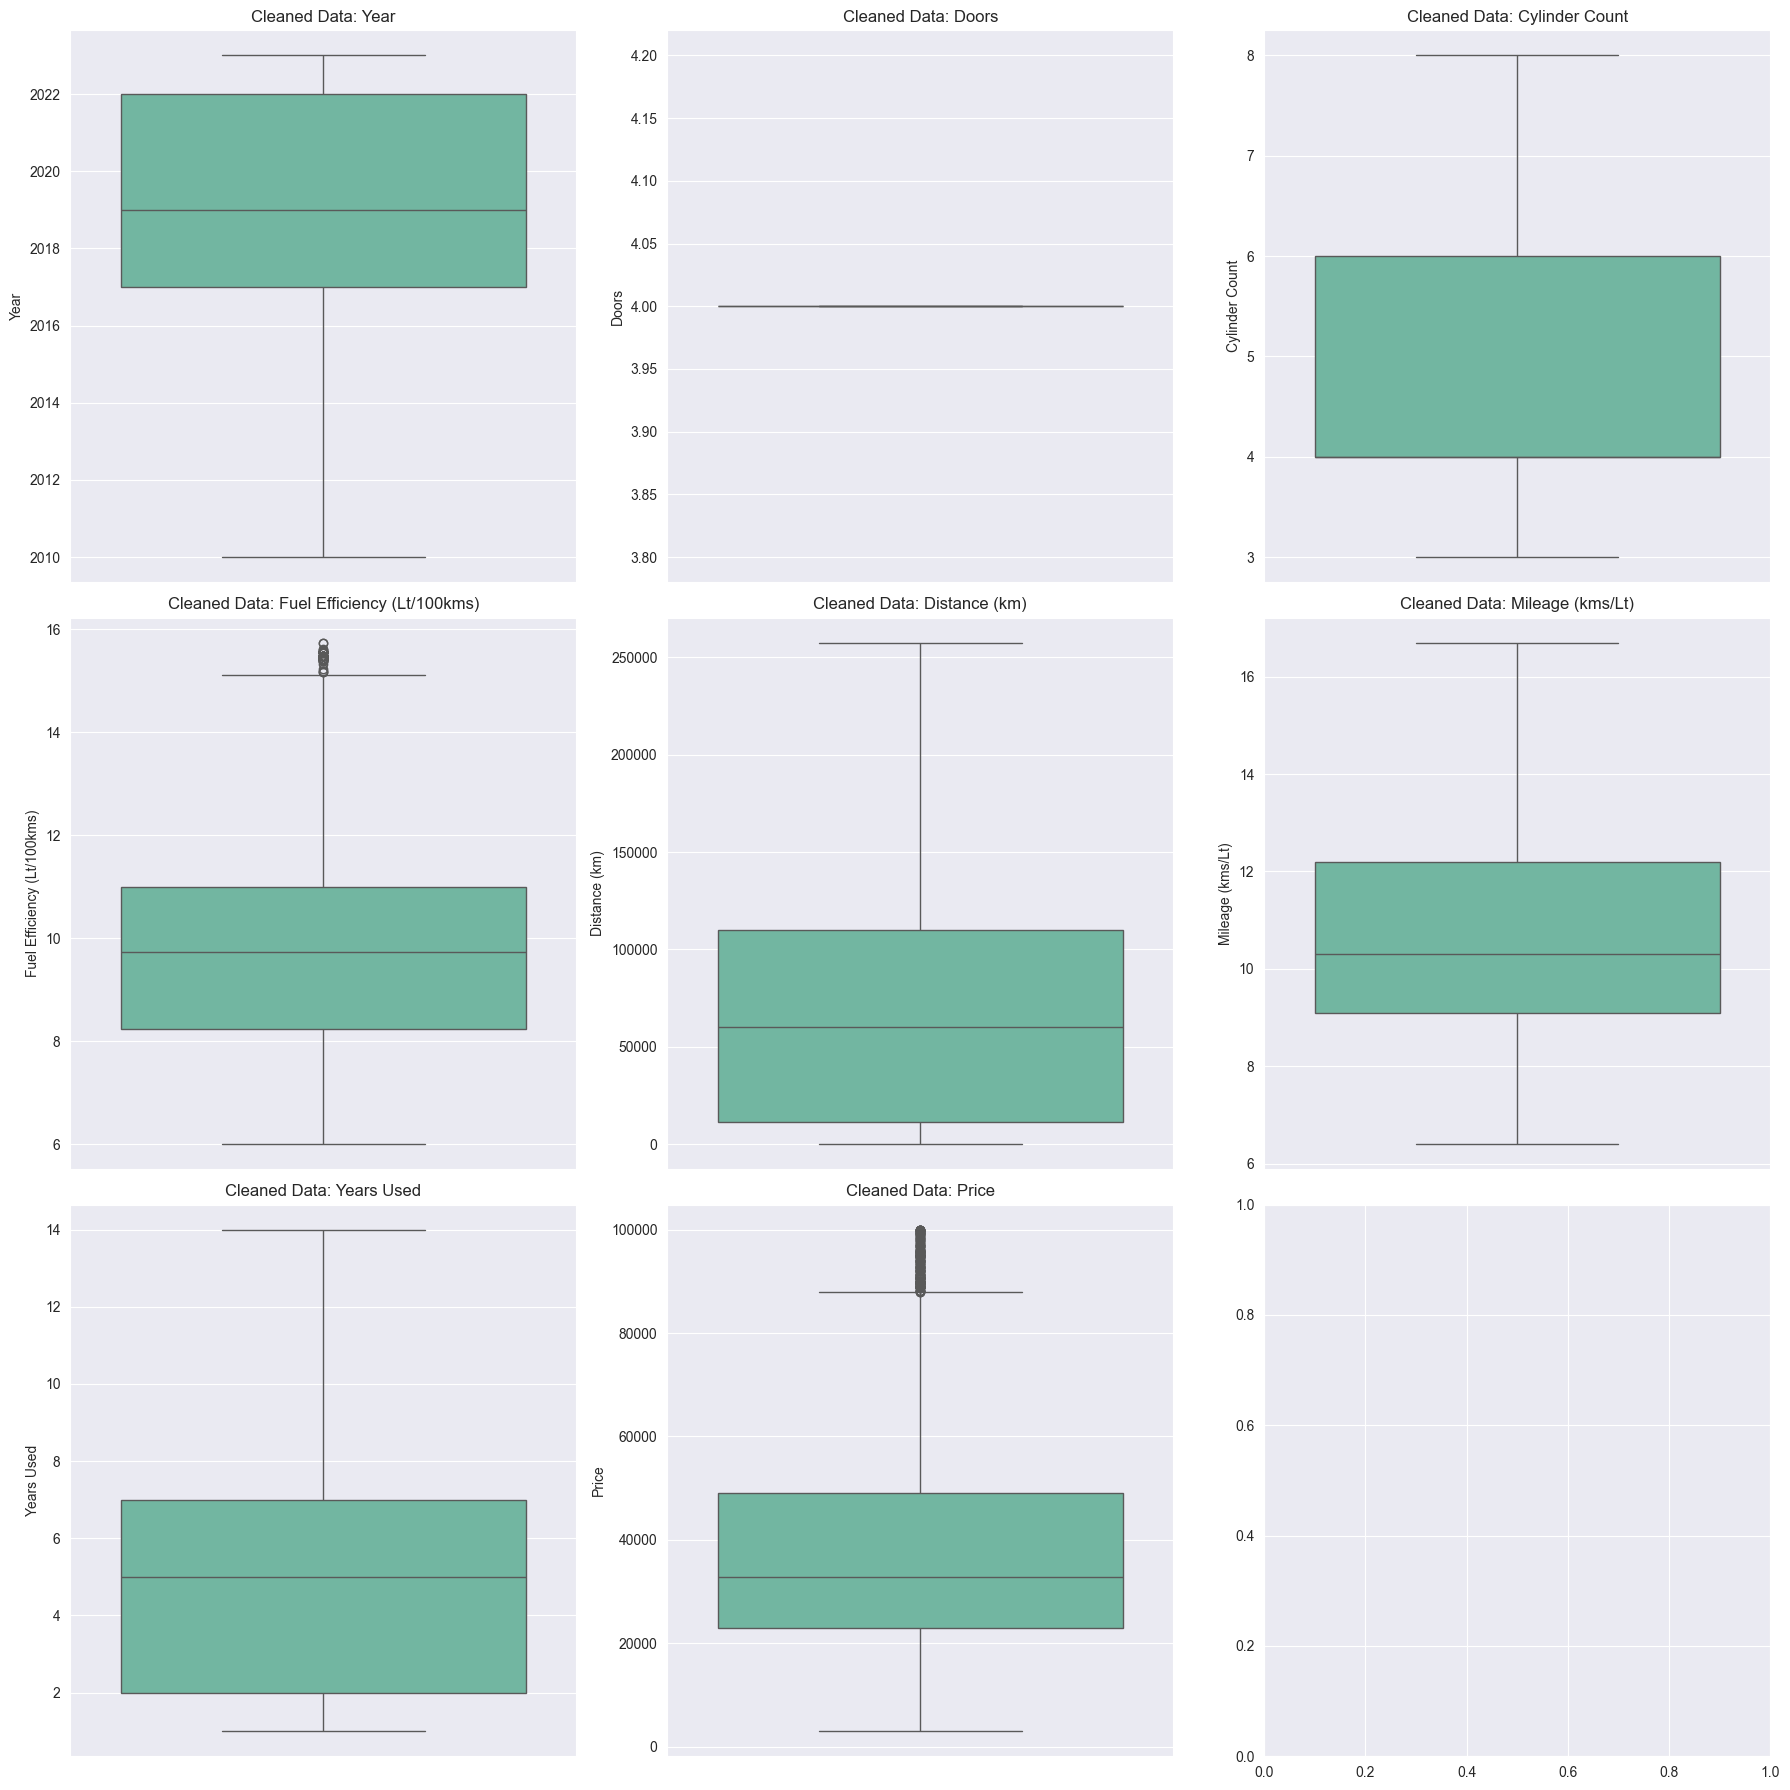

In [32]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

# Plotting boxplots for cleaned data
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df_clean[col], ax=axes[i])
    axes[i].set_title(f'Cleaned Data: {col}')

plt.tight_layout()
plt.show()

## 2. Bar Plot:

### 2.1 Brand X Price

In [33]:
# Example of creating the figure (make sure this code is executed)
s1 = df[~pd.isnull(df['Brand'])]['Brand']
chart = pd.value_counts(s1).to_frame(name='data')
chart['percent'] = (chart['data'] / chart['data'].sum()) * 100
ordinal_data = df.groupby('Brand')['Price'].sum()
chart['ordinal'] = ordinal_data
chart.index.name = 'labels'
chart = chart.reset_index().sort_values('ordinal').head(100)

charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
charts.append(go.Scatter(
    x=chart['labels'].values, y=chart['ordinal'].values, yaxis='y2',
    name='Price (sum)', line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
))

figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Brand Value Price'},
    'xaxis': {'title': {'text': 'Brand'}},
    'yaxis': {'title': {'text': 'Frequency'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'Price (sum)'}}
}))
pio.show(figure)


C:\Users\HP\AppData\Local\Temp\ipykernel_19528\3687922733.py:3: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



### 2.2 Body Type Frequency Bar Chart

In [34]:
s2 = df[~pd.isnull(df['Body Type'])]['Body Type']
chart = pd.value_counts(s2).to_frame(name='data')
chart['percent'] = (chart['data'] / chart['data'].sum()) * 100
chart.index.name = 'labels'
chart = chart.reset_index().sort_values(['data', 'labels'], ascending=[False, True])
chart = chart[:100]
charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Body Type Value Counts'},
    'xaxis': {'title': {'text': 'Body Type'}},
    'yaxis': {'title': {'text': 'Frequency'}}
}))
pio.show(figure)

C:\Users\HP\AppData\Local\Temp\ipykernel_19528\1112238022.py:2: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



### 2.3 Model Mileage Count:

In [35]:
s3 = df[~pd.isnull(df['Model'])]['Model']
chart = pd.value_counts(s3).to_frame(name='data')
chart['percent'] = (chart['data'] / chart['data'].sum()) * 100
ordinal_data = df.groupby('Model')[['Mileage (kms/Lt)']].nunique()
chart['ordinal'] = ordinal_data
chart.index.name = 'labels'
chart = chart.reset_index().sort_values('ordinal')
chart = chart[:20]
charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
charts.append(go.Scatter(
	x=chart['labels'].values, y=chart['ordinal'].values, yaxis='y2',
	name='Mileage (kms/Lt) (nunique)', line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Model Value Counts'},
    'xaxis': {'title': {'text': 'Model'}},
    'yaxis': {'title': {'text': 'Frequency'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'Mileage (kms/Lt) (nunique)'}}
}))
pio.show(figure)


C:\Users\HP\AppData\Local\Temp\ipykernel_19528\2481228470.py:2: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



## 3. Line Plot:

C:\Users\HP\AppData\Local\Temp\ipykernel_19528\3810508351.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\HP\AppData\Local\Temp\ipykernel_19528\3810508351.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\HP\AppData\Local\Temp\ipykernel_19528\3810508351.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\HP\AppData\Local\Temp\ipykernel_19528\3810508351.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\HP\AppData\Local\Temp\ipykernel_19528\3810508351.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\HP\AppData\Local\Temp

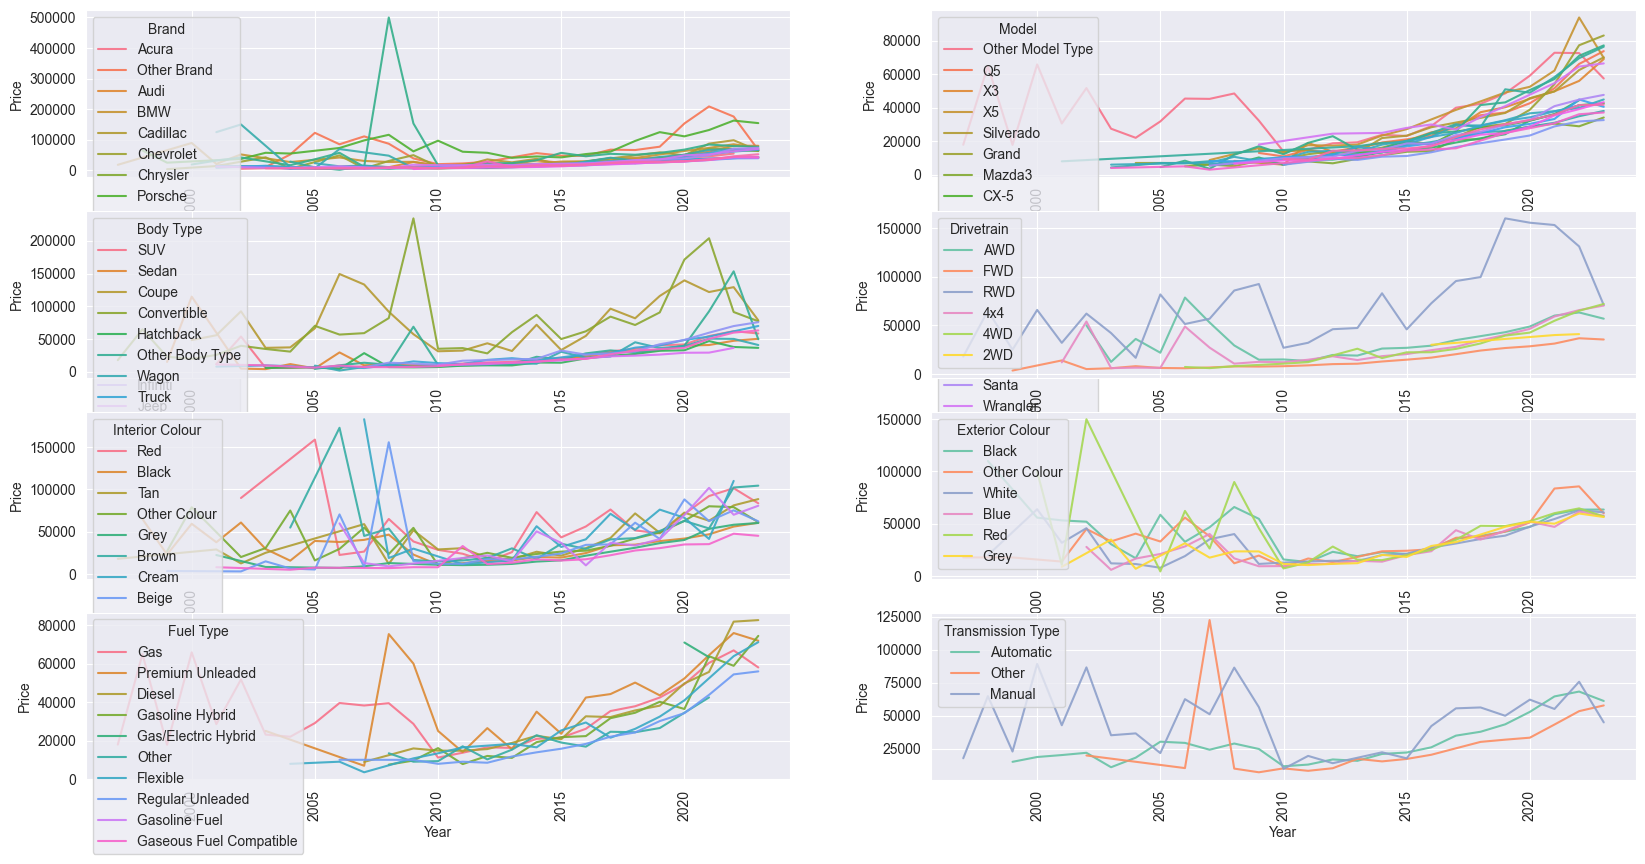

In [36]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20,10))
axs = axs.ravel()

for i, var in enumerate(categorical_columns):
    sns.lineplot(x='Year', y='Price', hue=var, data=df, ax=axs[i], errorbar=None, estimator='mean', alpha=0.9)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

plt.show()

## 4. Scatter Plot:

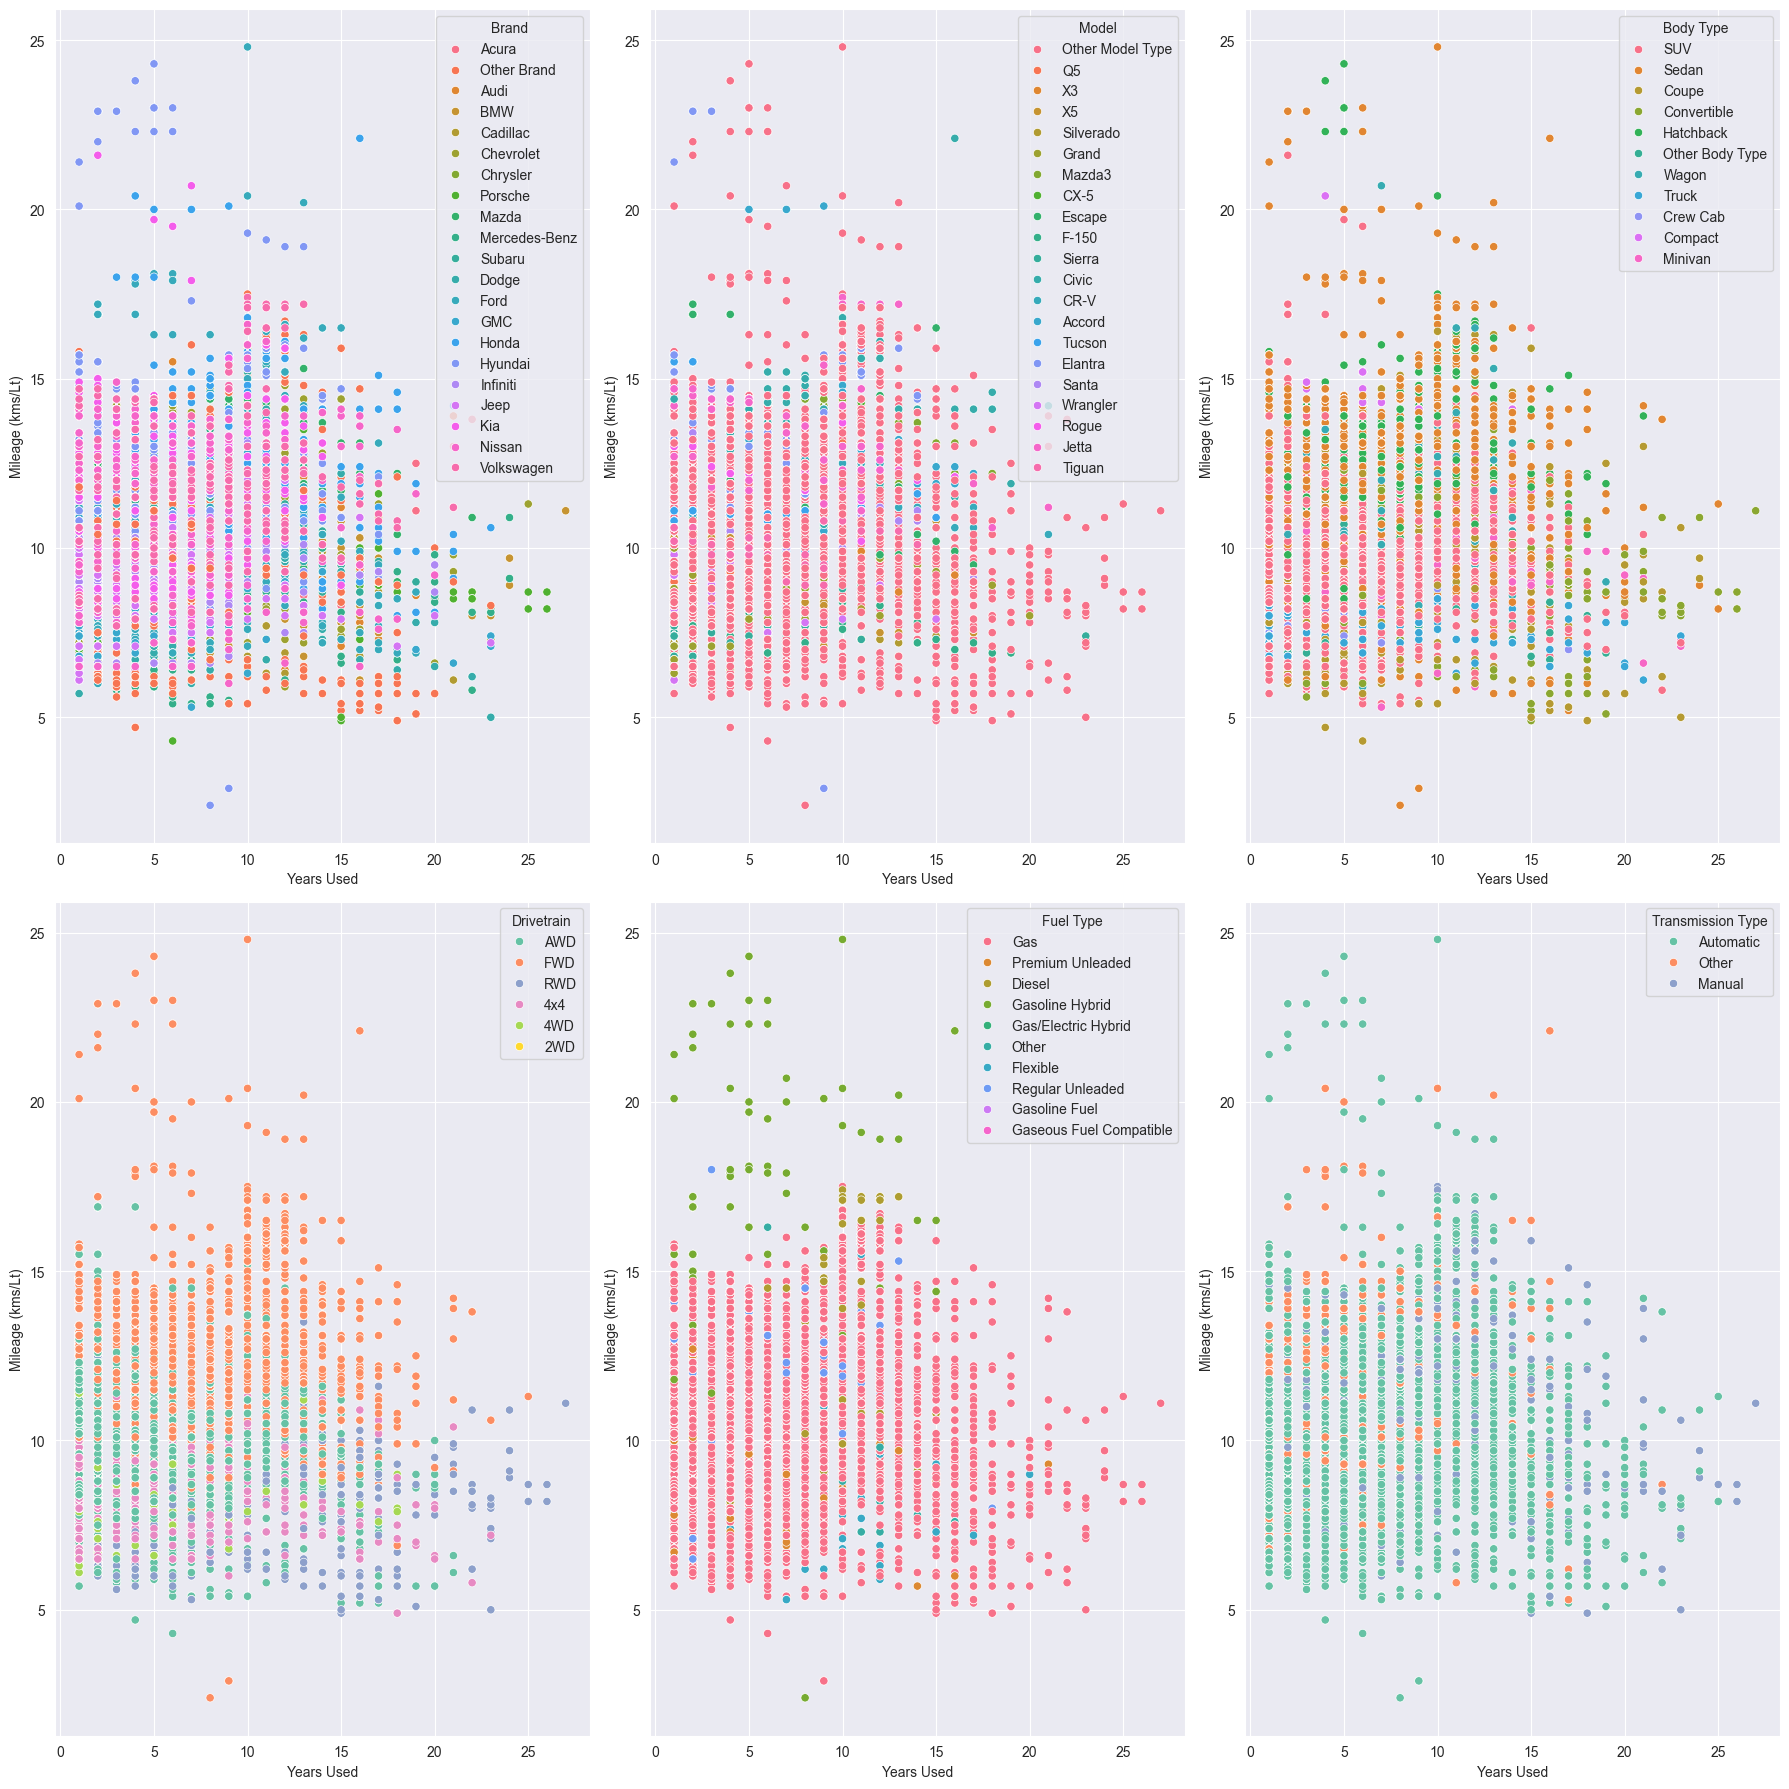

In [37]:
cols = ['Brand', 'Model', 'Body Type', 'Drivetrain', 'Fuel Type','Transmission Type']

fig, axs = plt.subplots(2, 3, figsize=(18, 18))
axs = axs.flatten()

for i, var in enumerate(cols):
    sns.scatterplot(x='Years Used', y='Mileage (kms/Lt)', hue=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()

## 5. Correlation Matrix

In [38]:
df2 = pd.read_csv("imputed_df.csv")
columns = df2.columns
df2.head()

,Year,Brand,Model,Body Type,Drivetrain,Interior Colour,Exterior Colour,Fuel Type,Transmission Type,Doors,Cylinder Count,Fuel Efficiency (Lt/100kms),Distance (km),Mileage (kms/Lt),Years Used,Price
0,2019.0,0.0,10.0,8.0,3.0,7.0,0.0,2.0,0.0,4.0,6.0,10.87,53052.0,9.2,5.0,43880.0
1,2018.0,0.0,10.0,8.0,3.0,1.0,3.0,2.0,0.0,3.0,6.0,10.98,77127.0,9.1,6.0,36486.0
2,2019.0,0.0,10.0,8.0,3.0,1.0,5.0,8.0,0.0,4.0,4.0,9.92,33032.0,10.1,5.0,40888.0
3,2020.0,0.0,10.0,8.0,3.0,1.0,5.0,2.0,2.0,4.0,4.0,9.92,50702.0,10.1,4.0,44599.0
4,2021.0,0.0,10.0,8.0,3.0,7.0,1.0,2.0,2.0,4.0,4.0,10.31,67950.0,9.7,3.0,46989.0


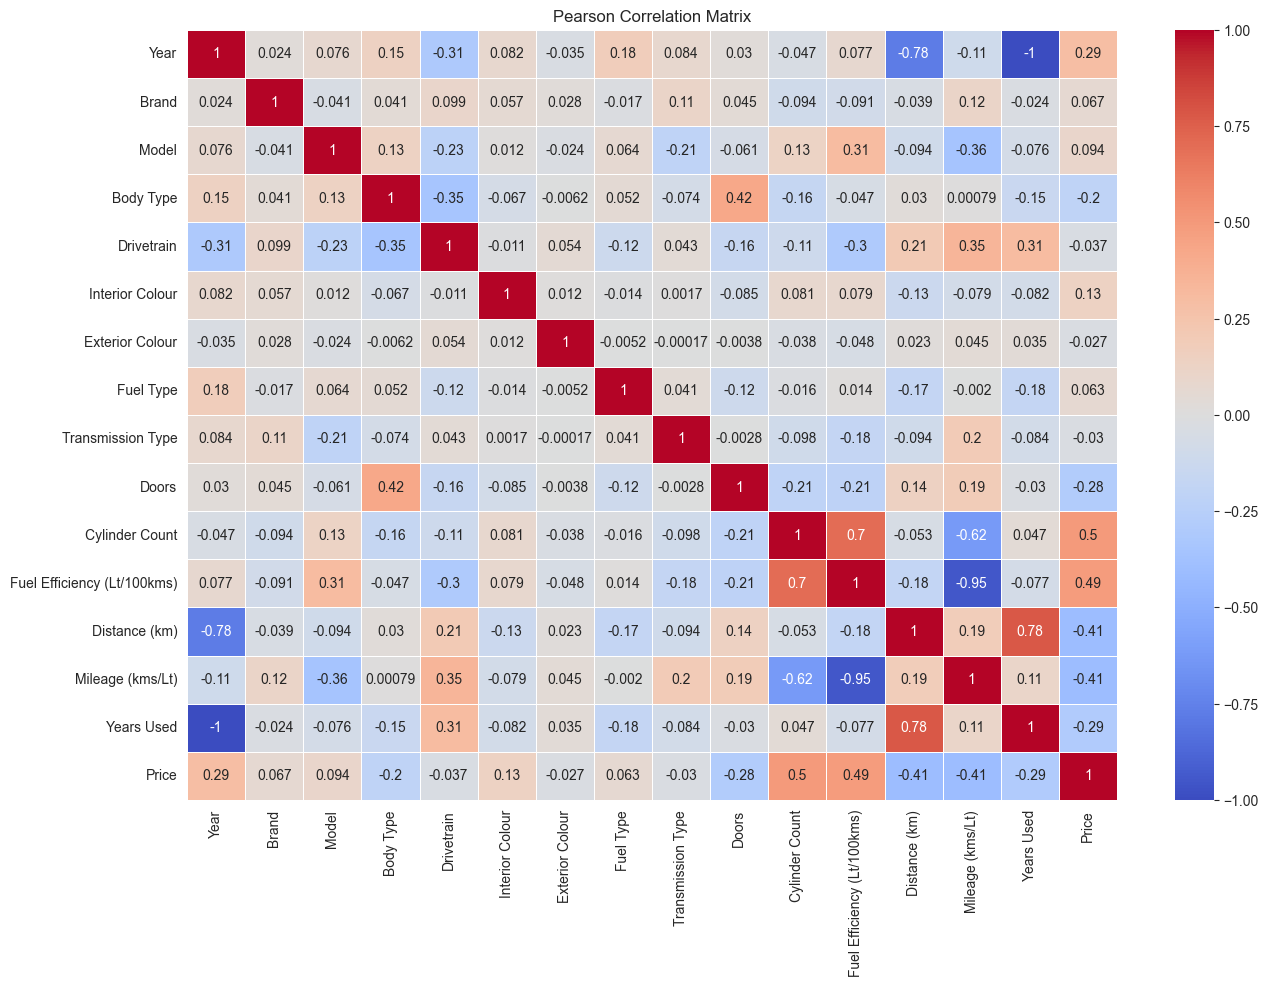

In [39]:
corr_matrix = df2[columns].corr()

#Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, fmt='.2g', annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

5.1 Eliminating columns having high multi collinearity:

In [40]:
final_df = df2[['Brand', 'Model', 'Body Type', 'Drivetrain',
       'Interior Colour', 'Exterior Colour', 'Fuel Type',
       'Transmission Type', 'Doors', 'Cylinder Count', 'Distance (km)', 'Mileage (kms/Lt)',
       'Years Used', 'Price']]
final_df.head()

,Brand,Model,Body Type,Drivetrain,Interior Colour,Exterior Colour,Fuel Type,Transmission Type,Doors,Cylinder Count,Distance (km),Mileage (kms/Lt),Years Used,Price
0,0.0,10.0,8.0,3.0,7.0,0.0,2.0,0.0,4.0,6.0,53052.0,9.2,5.0,43880.0
1,0.0,10.0,8.0,3.0,1.0,3.0,2.0,0.0,3.0,6.0,77127.0,9.1,6.0,36486.0
2,0.0,10.0,8.0,3.0,1.0,5.0,8.0,0.0,4.0,4.0,33032.0,10.1,5.0,40888.0
3,0.0,10.0,8.0,3.0,1.0,5.0,2.0,2.0,4.0,4.0,50702.0,10.1,4.0,44599.0
4,0.0,10.0,8.0,3.0,7.0,1.0,2.0,2.0,4.0,4.0,67950.0,9.7,3.0,46989.0


In [41]:
final_df.to_csv(r"P:\Personal Projects\Vehicle Price Prediction\Vehicle Price Prediction\Datasets\3. final_df.csv",index=False)